In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [40]:
# 生成1到10区间 等分100个数
x = np.linspace(1, 10, 100)
# 随机生成100个数
y = np.sin(x)

rng = np.random.RandomState(0)
# 随机生成一些扰动
y[::5] += 2 * (0.5 - rng.rand(x.shape[0] // 5))

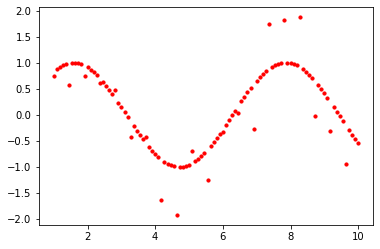

In [41]:
# s=点的大小
plt.scatter(x, y, s=10, c="red")
plt.show()